<a href="https://colab.research.google.com/github/pipecode-br/deep_learning_pytorch/blob/main/ClassificadorMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Etapa 1- Importar bibliotecas

In [1]:
#Import Pytorch CNN e base de dados
import torch
import torch.nn as nn
from torch import optim

# import database
from torchvision import datasets
import torchvision.transforms as transforms

# import utils
import numpy as np
import matplotlib.pyplot as plt

torch.__version__

'1.10.0+cu111'

In [2]:
#criar transformador
transform = transforms.ToTensor()

#baixar base de dados
train = datasets.MNIST(root='.',train=True,download=True,transform=transform)
test = datasets.MNIST(root='.',train=False,download=True,transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [3]:
print(train.data.shape)
print(train.targets)

torch.Size([60000, 28, 28])
tensor([5, 0, 4,  ..., 5, 6, 8])


In [4]:
# criar loader
train_loader = torch.utils.data.DataLoader(train,batch_size=128)
test_loader = torch.utils.data.DataLoader(test,batch_size=128)

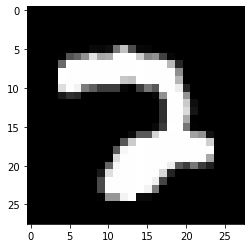

In [5]:
imagem = next(iter(train_loader))[0][120].view(28,28)#(1 1 28 28)
plt.imshow(imagem,cmap='gray')


(array([592.,   9.,  12.,  10.,   7.,   9.,   5.,   8.,   8., 124.]),
 array([0.        , 0.09960784, 0.19921568, 0.29882354, 0.39843136,
        0.49803922, 0.5976471 , 0.6972549 , 0.7968627 , 0.8964706 ,
        0.99607843], dtype=float32),
 <a list of 10 Patch objects>)

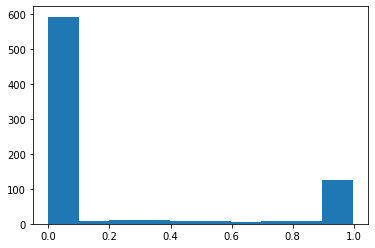

In [6]:
plt.hist(imagem.view(-1))

In [7]:
class classificador(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1,out_channels=32,kernel_size=(3,3))
    self.conv2 = nn.Conv2d(in_channels=32,out_channels=32,kernel_size=(3,3))
    self.activation = nn.ReLU()
    self.bnorm = nn.BatchNorm2d(num_features=32)
    self.pool = nn.MaxPool2d(kernel_size=(2,2))
    self.flatten = nn.Flatten()

    #800
    self.linear1 = nn.Linear(in_features=32*5*5,out_features=128)
    self.linear2 = nn.Linear(128,128)
    self.output = nn.Linear(128,10)
    self.dropout = nn.Dropout(p=0.2)

  def forward(self,X):
    X = self.pool(self.bnorm(self.activation(self.conv1(X))))
    X = self.pool(self.bnorm(self.activation(self.conv2(X))))
    X = self.flatten(X)

    X = self.dropout(self.activation(self.linear1(X)))
    X = self.dropout(self.activation(self.linear2(X)))
    X = self.output(X)

    return X



In [8]:
net = classificador()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
print(net.__dict__['_modules'])
print(list(net.modules()))

OrderedDict([('conv1', Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))), ('conv2', Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))), ('activation', ReLU()), ('bnorm', BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)), ('pool', MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)), ('flatten', Flatten(start_dim=1, end_dim=-1)), ('linear1', Linear(in_features=800, out_features=128, bias=True)), ('linear2', Linear(in_features=128, out_features=128, bias=True)), ('output', Linear(in_features=128, out_features=10, bias=True)), ('dropout', Dropout(p=0.2, inplace=False))])
[classificador(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (activation): ReLU()
  (bnorm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (flatten): Fl

In [9]:
from torchsummary import summary

summary(net, (1 , 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
              ReLU-2           [-1, 32, 26, 26]               0
       BatchNorm2d-3           [-1, 32, 26, 26]              64
         MaxPool2d-4           [-1, 32, 13, 13]               0
            Conv2d-5           [-1, 32, 11, 11]           9,248
              ReLU-6           [-1, 32, 11, 11]               0
       BatchNorm2d-7           [-1, 32, 11, 11]              64
         MaxPool2d-8             [-1, 32, 5, 5]               0
           Flatten-9                  [-1, 800]               0
           Linear-10                  [-1, 128]         102,528
             ReLU-11                  [-1, 128]               0
          Dropout-12                  [-1, 128]               0
           Linear-13                  [-1, 128]          16,512
             ReLU-14                  [